### Importing Libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve,accuracy_score,precision_score
import nltk
from nltk.corpus import stopwords
import re
from tabulate import tabulate
import plotly.express as px
import plotly.graph_objects as go

### Data 

In [19]:
df=pd.read_csv("fake_job_postings.csv")
df.head()

job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...              0   
2                                                NaN              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0             NaN                 NaN   
3                 1              0       Full-time    Mid-Senior level   
4                 1              1       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0                NaN                        NaN             Marketing   
1                NaN  Marketing and Advertising      Customer Service   
2                NaN                        NaN                   NaN   
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0

### EDA

In [20]:
print("Dataset Shape:", df.shape)
print("Dataset Info:")
print(df.info())
print("Null Values:")
print(df.isnull().sum())
print("Fraudulent Value Counts:")
print(df['fraudulent'].value_counts())

Dataset Shape: (17880, 18)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry    

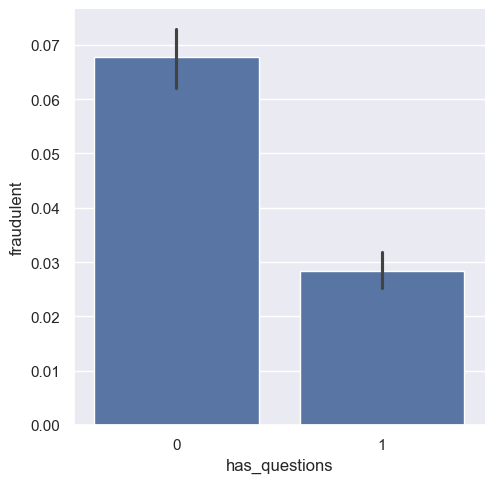

In [23]:
sns.catplot(data=df, y='fraudulent', x='has_questions', kind='bar')

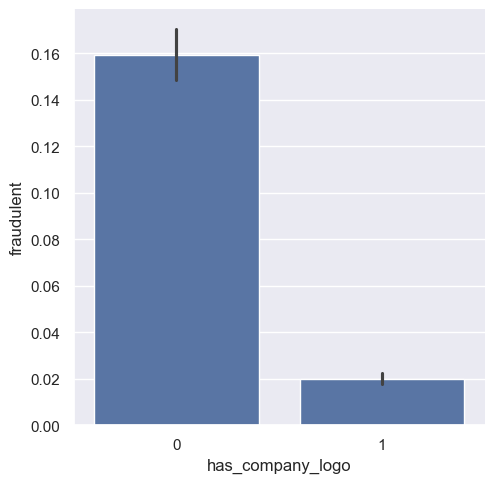

In [25]:
sns.catplot(data=df, y='fraudulent', x='has_company_logo', kind='bar')

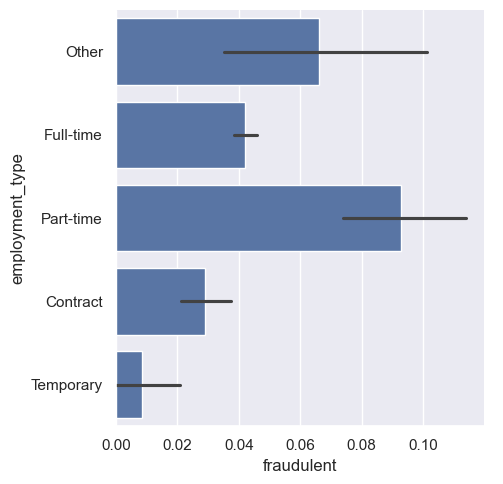

In [26]:
sns.catplot(data=df, x='fraudulent', y='employment_type', kind='bar')

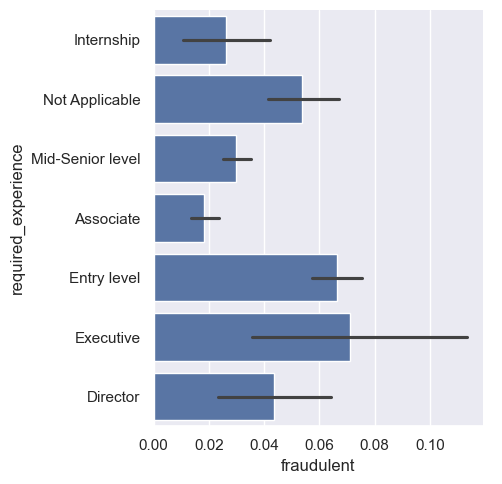

In [27]:
sns.catplot(data=df, x='fraudulent', y='required_experience', kind='bar')

### Handling Missing data

In [28]:
# For text columns, replace missing values with an empty string
text_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits']
df[text_columns] = df[text_columns].fillna(' ')

In [29]:
df['location'].fillna('Unknown', inplace=True)
df['department'].fillna('Unknown', inplace=True)
df['salary_range'].fillna('Not Specified', inplace=True)
df['employment_type'].fillna('Not Specified', inplace=True)
df['required_experience'].fillna('Not Specified', inplace=True)
df['required_education'].fillna('Not Specified', inplace=True)
df['industry'].fillna('Not Specified', inplace=True)
df['function'].fillna('Not Specified', inplace=True)

C:\Users\joshi\AppData\Local\Temp\ipykernel_12860\1166088697.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['location'].fillna('Unknown', inplace=True)
C:\Users\joshi\AppData\Local\Temp\ipykernel_12860\1166088697.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

### Percentage of values present in class 0 = Non- Fraudulent and class 1 = Fraudulent

In [47]:
print("Percentage of Data with Class 0: ",df['fraudulent'].value_counts()[0] /df.shape[0] *100) 
print("Percentage of Data with Class 1: ",df['fraudulent'].value_counts()[1] /df.shape[0] *100)

Percentage of Data with Class 0:  95.1565995525727
Dercentage of Data with Class 1:  4.8434004474272925


In [31]:
df.describe(include='object')

title         location department   salary_range  \
count                     17880            17880      17880          17880   
unique                    11231             3106       1337            875   
top     English Teacher Abroad   GB, LND, London    Unknown  Not Specified   
freq                        311              718      11548          15012   

       company_profile                                        description  \
count            17880                                              17880   
unique            1710                                              14802   
top                     Play with kids, get paid for it Love travel? J...   
freq              3308                                                379   

       requirements benefits employment_type required_experience  \
count         17880    17880           17880               17880   
unique        11968     6205               6                   8   
top                                Full-time       Not Specified   
freq           2696     7212           11620                7050   

       required_education       industry       function  
count               17880          17880          17880  
unique                 14            132             38  
top         Not Specified  Not Specified  Not Specified  
freq                 8105           4903           6455

### Count of Titles present in NON Fraud

In [52]:
df[df['fraudulent']==0]['title'].value_counts()[:20]

title
english teacher abroad                             406
customer service associate                         198
graduates english teacher abroad conversational    144
customer service associate part time                95
software engineer                                   93
english teacher abroad conversational               83
account manager                                     80
project manager                                     78
web developer                                       72
beauty fragrance consultants needed                 60
graduates english teacher abroad                    57
ios developer                                       53
product manager                                     52
senior software engineer                            50
marketing manager                                   50
frontend developer                                  49
account executive                                   49
customer service team lead                          49
sale

### Count of Titles present in Fraud

In [51]:
df[df['fraudulent']==1]['title'].value_counts()[:20]

title
administrative assistant                                          21
home based payroll typistdata entry clerks positions available    21
cruise staff wanted urgent                                        21
data entry adminclerical positions work home                      21
customer service representative                                   19
home based payroll data entry clerk position earn daily           12
data entry                                                        11
payroll clerk                                                     11
payroll data coordinator positions earn daily                     10
account sales managers yr                                         10
network marketing                                                 10
call center representative                                        10
agency sales managers yr                                           9
customer service rep                                               8
executive chef              

### Loactions present over all

In [57]:
df.location.value_counts()[:20]

location
GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
Unknown                  346
US, ,                    339
US, TX, Houston          269
US, IL, Chicago          255
US, DC, Washington       251
DE, BE, Berlin           221
NZ, N, Auckland          218
US, CA, Los Angeles      185
GB, , London             179
US, TX, Austin           174
US, CA, San Diego        164
GB, ,                    138
US, GA, Atlanta          135
GB, LND,                 131
US, OR, Portland         131
CA, ON, Toronto          123
Name: count, dtype: int64

In [53]:
df[df['fraudulent']==1]['location'].value_counts()[:20]

location
US, TX, Houston          92
AU, NSW, Sydney          31
US, ,                    28
US, CA, Bakersfield      24
US, CA, Los Angeles      23
US, CA, San Mateo        22
US, NY, New York         20
Unknown                  19
US, TX, AUSTIN           14
US, CA, San Jose         14
US, TX, DALLAS           12
US, MD, Baltimore        11
US, CA, San Francisco    11
US, CA,                   9
US, NY, NY                8
US, OH, Cincinnati        8
US, TX, Austin            7
MY, ,                     7
CA, ON, Toronto           6
US, WA, Seattle           6
Name: count, dtype: int64

In [54]:
df[df['fraudulent']==0]['location'].value_counts()[:20]

location
GB, LND, London          716
US, NY, New York         638
GR, I, Athens            464
US, CA, San Francisco    461
Unknown                  327
US, ,                    311
US, IL, Chicago          251
US, DC, Washington       249
DE, BE, Berlin           221
NZ, N, Auckland          218
GB, , London             178
US, TX, Houston          177
US, TX, Austin           167
US, CA, San Diego        163
US, CA, Los Angeles      162
GB, ,                    137
US, OR, Portland         130
US, GA, Atlanta          130
GB, LND,                 129
CA, ON, Toronto          117
Name: count, dtype: int64

### Find unique entries 

In [33]:
categorical_columns = []
for col in df.columns:
    print(f'Unique rows in {col}:', df[col].nunique())
    if df[col].nunique() < 15:
        categorical_columns.append(col)
print('Categorical columns:', categorical_columns)

Unique rows in job_id: 17880
Unique rows in title: 11231
Unique rows in location: 3106
Unique rows in department: 1337
Unique rows in salary_range: 875
Unique rows in company_profile: 1710
Unique rows in description: 14802
Unique rows in requirements: 11968
Unique rows in benefits: 6205
Unique rows in telecommuting: 2
Unique rows in has_company_logo: 2
Unique rows in has_questions: 2
Unique rows in employment_type: 6
Unique rows in required_experience: 8
Unique rows in required_education: 14
Unique rows in industry: 132
Unique rows in function: 38
Unique rows in fraudulent: 2
Categorical columns: ['telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'fraudulent']


### NLP Libraries Installations and Text Preprocessing

In [61]:
!pip install nltk


In [69]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download required resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')  # For multilingual WordNet support

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Ensure the input is a string
    if not isinstance(text, str):
        return ""
    
    # Convert text to lowercase
    text = text.lower()
    
    # Remove numbers and extra whitespace
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove stopwords
    words = [word for word in text.split() if word not in stop_words]
    
    # Tokenize the text
    tokens = nltk.word_tokenize(" ".join(words))
    
    # Lemmatize tokens
    processed_tokens = [
        lemmatizer.lemmatize(word)  # Lemmatize each word
        for word in tokens
        if word.isalnum()  # Retain only alphanumeric words
    ]
    
    # Return the processed text as a single string
    return " ".join(processed_tokens)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\joshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\joshi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\joshi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [63]:
# from nltk.tokenize import word_tokenize
# from nltk.corpus import wordnet

# print(word_tokenize("This is a test sentence."))
# print(wordnet.synsets("car"))


['This', 'is', 'a', 'test', 'sentence', '.']
[Synset('car.n.01'), Synset('car.n.02'), Synset('car.n.03'), Synset('car.n.04'), Synset('cable_car.n.01')]


In [70]:
# Apply preprocessing to text columns
for col in text_columns:
    df[col] = df[col].apply(preprocess_text)

In [71]:
# Combining text columns into a single feature
df['text'] = df[text_columns].apply(lambda x: ' '.join(x), axis=1)

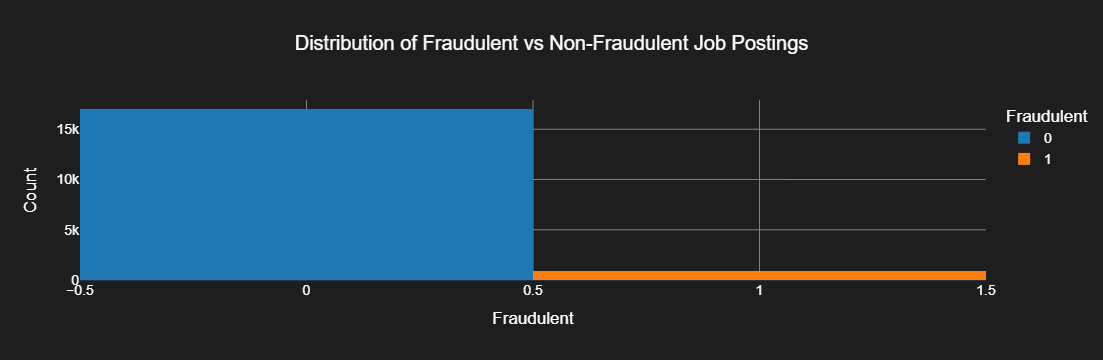

In [72]:
# Distribution of fraudulent vs non-fraudulent job postings
fig = px.histogram(df, x='fraudulent', title='Distribution of Fraudulent vs Non-Fraudulent Job Postings',
                   labels={'fraudulent': 'Fraudulent'}, color='fraudulent',
                   color_discrete_sequence=['#1f77b4', '#ff7f0e'])
fig.update_layout(
    template='plotly_dark',
    xaxis_title='Fraudulent',
    yaxis_title='Count',
    title_x=0.5,
    font=dict(family="Arial, sans-serif", size=14, color="white"),
    paper_bgcolor='#1e1e1e',
    plot_bgcolor='#1e1e1e',
    xaxis=dict(gridcolor='gray'),
    yaxis=dict(gridcolor='gray')
)
fig.show()

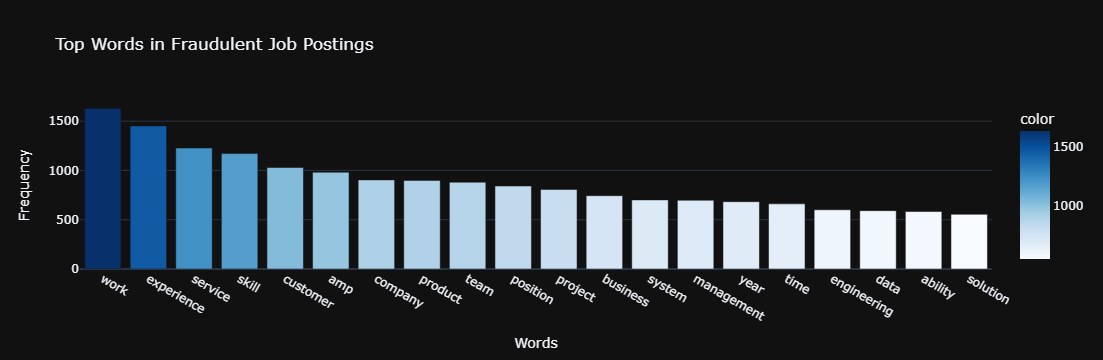

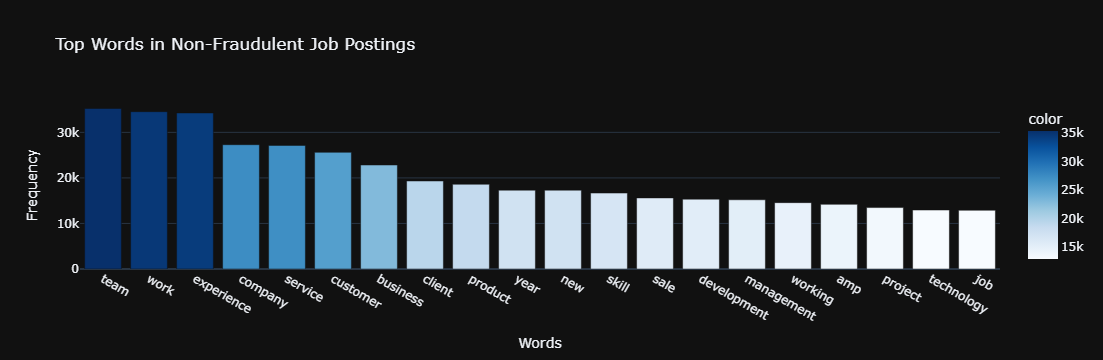

In [73]:
# Top words in fraudulent job postings
fraudulent_jobs = df[df['fraudulent'] == 1]['text']
non_fraudulent_jobs = df[df['fraudulent'] == 0]['text']

def plot_top_words(text, title):
    word_freq = pd.Series(' '.join(text).split()).value_counts().head(20)
    fig = px.bar(word_freq, x=word_freq.index, y=word_freq.values, title=title,
                 labels={'index': 'Words', 'y': 'Frequency'},
                 color=word_freq.values, color_continuous_scale='Blues')
    fig.update_layout(template='plotly_dark')
    fig.show()

plot_top_words(fraudulent_jobs, 'Top Words in Fraudulent Job Postings')
plot_top_words(non_fraudulent_jobs, 'Top Words in Non-Fraudulent Job Postings')

In [125]:
# Feature extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['text']).toarray()
y = df['fraudulent']

In [126]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((14304, 3000), (3576, 3000), (14304,), (3576,))

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [130]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)

In [131]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
   
}

In [132]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [133]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9790268456375839
Precision -  0.9649122807017544
For  KN
Accuracy -  0.9818232662192393
Precision -  0.9027777777777778
For  NB
Accuracy -  0.9658836689038032
Precision -  0.9836065573770492
For  DT
Accuracy -  0.9644854586129754
Precision -  0.9090909090909091
For  LR
Accuracy -  0.9739932885906041
Precision -  0.9583333333333334
For  RF
Accuracy -  0.9804250559284117
Precision -  1.0


E:\Anaconda Latest Install\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



For  AdaBoost
Accuracy -  0.9633668903803132
Precision -  0.7049180327868853


In [122]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [123]:
performance_df

Algorithm  Accuracy  Precision
5        RF  0.979586   0.990909
2        NB  0.964485   0.982143
4        LR  0.973993   0.958333
0       SVC  0.978747   0.956522
3        DT  0.968680   0.896552
1        KN  0.981264   0.885135
6  AdaBoost  0.965884   0.780952

In [134]:
# Model training using Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [135]:
# Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [136]:
# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3395
           1       1.00      0.61      0.76       181

    accuracy                           0.98      3576
   macro avg       0.99      0.81      0.88      3576
weighted avg       0.98      0.98      0.98      3576

Confusion Matrix:
[[3395    0]
 [  70  111]]
ROC AUC Score: 0.9661396756686385


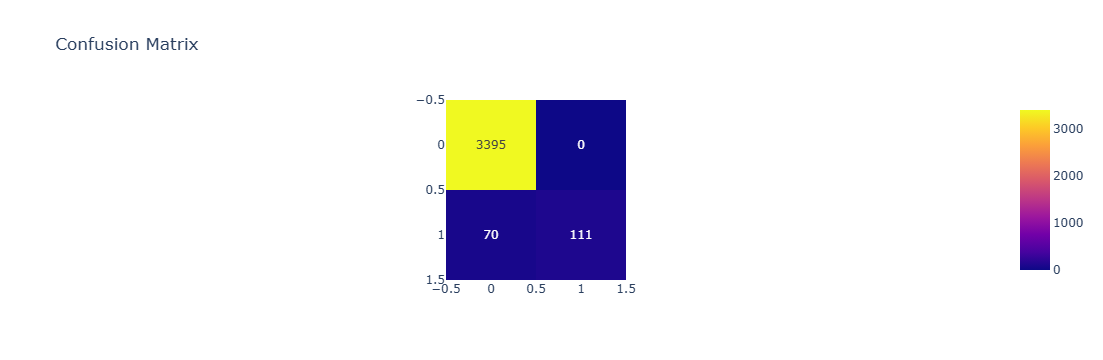

In [137]:
# Visualization of Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
fig = px.imshow(conf_matrix, text_auto=True, title='Confusion Matrix')
fig.show()

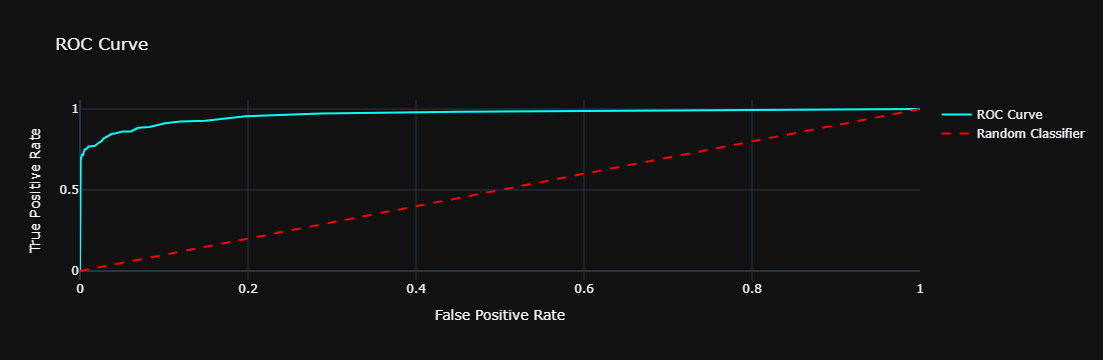

In [138]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_fig = go.Figure()
roc_fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve', line=dict(color='cyan')))
roc_fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Classifier', line=dict(dash='dash', color='red')))
roc_fig.update_layout(title='ROC Curve', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate', template='plotly_dark')
roc_fig.show()

In [117]:
# Display 10 samples with actual and predicted values
samples = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
samples = samples.sample(150).reset_index(drop=True)
print("150 Sample Predictions:")
print(tabulate(samples, headers='keys', tablefmt='fancy_grid'))

150 Sample Predictions:
╒═════╤══════════╤═════════════╕
│     │   Actual │   Predicted │
╞═════╪══════════╪═════════════╡
│   0 │        0 │           0 │
├─────┼──────────┼─────────────┤
│   1 │        0 │           0 │
├─────┼──────────┼─────────────┤
│   2 │        0 │           0 │
├─────┼──────────┼─────────────┤
│   3 │        0 │           0 │
├─────┼──────────┼─────────────┤
│   4 │        0 │           0 │
├─────┼──────────┼─────────────┤
│   5 │        0 │           0 │
├─────┼──────────┼─────────────┤
│   6 │        0 │           0 │
├─────┼──────────┼─────────────┤
│   7 │        0 │           0 │
├─────┼──────────┼─────────────┤
│   8 │        0 │           0 │
├─────┼──────────┼─────────────┤
│   9 │        0 │           0 │
├─────┼──────────┼─────────────┤
│  10 │        0 │           0 │
├─────┼──────────┼─────────────┤
│  11 │        0 │           0 │
├─────┼──────────┼─────────────┤
│  12 │        0 │           0 │
├─────┼──────────┼─────────────┤
│  13 │        0 │ 

### Hyper parameter tuning


In [119]:
# change max_features parameters of tfidf to 5000 

In [139]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_5000':accuracy_scores,'Precision_max_ft_5000':precision_scores})

In [149]:
performance_df.merge(temp_df,on='Algorithm')

Algorithm  Accuracy  Precision  Accuracy_max_ft_5000  Precision_max_ft_5000
0        RF  0.979586   0.990909              0.980425               1.000000
1        NB  0.964485   0.982143              0.965884               0.983607
2        LR  0.973993   0.958333              0.973993               0.958333
3       SVC  0.978747   0.956522              0.979027               0.964912
4        DT  0.968680   0.896552              0.964485               0.909091
5        KN  0.981264   0.885135              0.981823               0.902778
6  AdaBoost  0.965884   0.780952              0.963367               0.704918